In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

import torch 
import torch.nn as nn
import torch.nn.functional as F

import warnings
warnings.filterwarnings('ignore')


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "d:\Github\Deep-Learning\.venv\Lib\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "d:\Github\Deep-Learning\.venv\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "d:\Github\Deep-Learning\.venv\Lib\site-packages\ipykernel\kernelapp.py", line 739, in start
    self.io_loop.start()
  File "d:\Github\Deep-Learning

In [2]:
# Creating a model class
class Model(nn.Module):
    def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
        super().__init__()      # instantiate the nn.Module 
        self.fc1 = nn.Linear(in_features, h1)       # fc1: fully connected 1
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2,out_features)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
    
        return x    

In [3]:
torch.manual_seed(42)
model = Model()

In [4]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

In [5]:
model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)

In [6]:
df = pd.read_csv("https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [7]:
df['species'] = df['species'].map({'setosa': 0, 'versicolor': 1, 'virginica': 2})
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [8]:
X = df.drop('species', axis=1).values
y = df['species'].values

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [10]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [11]:
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [12]:
epochs = 100
losses = []

for i in range(epochs):
    #predicting on train data
    y_pred = model.forward(X_train)
    
    # calculating the loss
    loss = criterion(y_pred, y_train)
    losses.append(loss.item())
    
    print(f'Epoch {i} | Loss: {loss} ')
    
    # Back Propagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch 0 | Loss: 1.0846847295761108 
Epoch 1 | Loss: 1.145750880241394 
Epoch 2 | Loss: 1.06221604347229 
Epoch 3 | Loss: 0.90346360206604 
Epoch 4 | Loss: 0.9186481237411499 
Epoch 5 | Loss: 0.8150155544281006 
Epoch 6 | Loss: 0.7114495038986206 
Epoch 7 | Loss: 0.6405209302902222 
Epoch 8 | Loss: 0.5749959945678711 
Epoch 9 | Loss: 0.5197580456733704 
Epoch 10 | Loss: 0.4931177496910095 
Epoch 11 | Loss: 0.47331011295318604 
Epoch 12 | Loss: 0.42245182394981384 
Epoch 13 | Loss: 0.4047977030277252 
Epoch 14 | Loss: 0.3633565604686737 
Epoch 15 | Loss: 0.3226219713687897 
Epoch 16 | Loss: 0.2647329866886139 
Epoch 17 | Loss: 0.2821061313152313 
Epoch 18 | Loss: 0.2305213063955307 
Epoch 19 | Loss: 0.16178755462169647 
Epoch 20 | Loss: 0.2083844095468521 
Epoch 21 | Loss: 0.21629777550697327 
Epoch 22 | Loss: 0.1107100248336792 
Epoch 23 | Loss: 0.21494847536087036 
Epoch 24 | Loss: 0.15200628340244293 
Epoch 25 | Loss: 0.15397007763385773 
Epoch 26 | Loss: 0.12215176969766617 
Epoch 27

In [13]:
journal = pd.DataFrame(losses,
                       columns=['loss'])
journal.index.name = 'epoch'
journal

,loss
epoch,
0,1.084685
1,1.145751
2,1.062216
3,0.903464
4,0.918648
...,...
95,0.053423
96,0.053347
97,0.053281


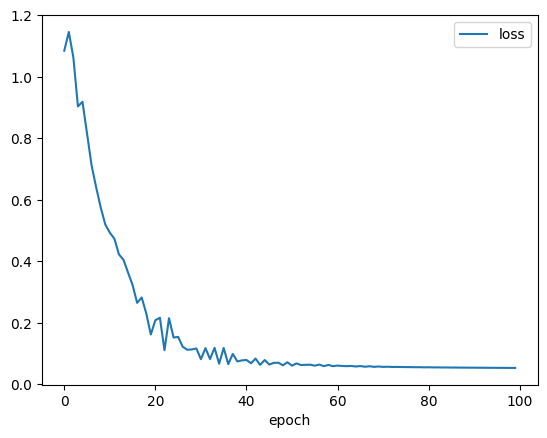

In [14]:
fig, ax = plt.subplots()
sns.lineplot(journal)
plt.show()

#### _Evaluate model on test data_

In [15]:
with torch.no_grad():
    y_eval = model.forward(X_test)
    loss = criterion(y_eval, y_test)
loss

tensor(0.0469)

In [16]:
correct = 0
with torch.no_grad():
    for i, data in enumerate(X_test):
        y_eval = model.forward(data)
        
        if y_eval.argmax().item() == y_test[i]:
            correct += 1
correct

30

#### _New Data feeding into the network_

In [17]:
new_data = torch.tensor([2.0,3.6,2.8,2.2])

In [18]:
with torch.no_grad():
    print(model(new_data).argmax().item())

1


#### _Saving & Loading the model_

In [19]:
torch.save(model.state_dict(), 'models/iris_detection.pt')

In [20]:
model_loaded = Model()
model_loaded.load_state_dict(torch.load('models/iris_detection.pt'))

<All keys matched successfully>

In [21]:
model_loaded.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)